# Flydubai Data Engineering And Observations

# Data merging for Data Engineering

In [ ]:
The data we have is the PNR level data, In the dataset 
if the journey is return then same PNR is present for return journey. 
The unique identifier in the dataset is not PNR, The reason we have to create new unique identifier 
in the dataset using the combination of PNR+ORIGIN+DESTINATION to create new combine data.

In [ ]:
import pandas as pd
df1 = pd.read_excel("All_Base_Files.xlsx")
df2 = pd.read_excel("all_SSR.xlsx")

df1["UID"] = df1["confirmation_num"]+df1["from_airport"]+df1["to_airport"]
df2["UID"] = df2["pnr"]+df2["from_airport"]+df2["to_airport"]

new_df = df1.merge(df2,on = "UID" , how = "left")
new_df.to_excel("df_cleaned_base.xlsx")


Added only ANC column in the dataset as ANC buy or Not

In [4]:
df = pd.read_excel("df_cleaned_base.xlsx")

In [5]:
df.head(5)

,UID,confirmation_num,from_airport,to_airport,year(departure_dt),month(departure_dt),res_book_dt_lcl_key,departure_dt,journey_type,pax,rev,ADT,CHILD,INF,Days before departure,ANC
0,RAALQXDXBGYD,RAALQX,DXB,GYD,2021,10,2021-10-27 00:00:00,2021-10-28 00:00:00,RT,7,3712.21,4,3,4,1,NaN
1,FP8S0JDXBTLV,FP8S0J,DXB,TLV,2021,9,2021-09-14 00:00:00,2021-09-15 00:00:00,OW,8,11018.90,5,3,3,1,NaN
2,QMI0J0DXBMHD,QMI0J0,DXB,MHD,2021,12,2021-12-06 00:00:00,2021-12-07 00:00:00,OW,9,7961.39,7,2,2,1,NaN
3,RAALQXGYDDXB,RAALQX,GYD,DXB,2021,10,2021-10-27 00:00:00,2021-10-31 00:00:00,RT,7,3315.00,4,3,4,4,NaN
4,XTBVKUMSQDXB,XTBVKU,MSQ,DXB,2022,2,2022-01-25 00:00:00,2022-02-20 00:00:00,OW,9,6091.33,7,2,1,26,NaN


In [14]:
df_origin = pd.read_excel("Destination.xlsx")
df_origin.head(5)

,from_airport,Destination City,Destination Country,Destination Region
0,ADD,Addis Ababa,Ethiopia,Africa
1,ADD,Addis Ababa,Ethiopia,Africa
2,ADD,Addis Ababa,Ethiopia,Africa
3,ADD,Addis Ababa,Ethiopia,Africa
4,ADE,Aden,Yemen,GCC


In [ ]:
df.merge(df_origin,on = "from_airport" , how = "left")
#Applying same for Destination

In [24]:
df = df.fillna("")
df.head(5)

,UID,confirmation_num,from_airport,to_airport,year(departure_dt),month(departure_dt),res_book_dt_lcl_key,departure_dt,journey_type,pax,...,INF,Days before departure,ANC,Origin City,Origin Country,Origin Region,Destination City,Destination Country,Destination Region,Dummy_Col
0,RAALQXDXBGYD,RAALQX,DXB,GYD,2021,10,2021-10-27 00:00:00,2021-10-28 00:00:00,RT,7,...,4,1,,Dubai,United Arab Emirates,Middle East,Baku,Azerbaijan,EU/CIS,1
1,FP8S0JDXBTLV,FP8S0J,DXB,TLV,2021,9,2021-09-14 00:00:00,2021-09-15 00:00:00,OW,8,...,3,1,,Dubai,United Arab Emirates,Middle East,Tel Aviv,Israel,EU/CIS,1
2,QMI0J0DXBMHD,QMI0J0,DXB,MHD,2021,12,2021-12-06 00:00:00,2021-12-07 00:00:00,OW,9,...,2,1,,Dubai,United Arab Emirates,Middle East,Mashhad,Iran,Middle East,1
3,RAALQXGYDDXB,RAALQX,GYD,DXB,2021,10,2021-10-27 00:00:00,2021-10-31 00:00:00,RT,7,...,4,4,,Baku,Azerbaijan,EU/CIS,Dubai,United Arab Emirates,Middle East,1
4,XTBVKUMSQDXB,XTBVKU,MSQ,DXB,2022,2,2022-01-25 00:00:00,2022-02-20 00:00:00,OW,9,...,1,26,,Minsk,Belarus,EU/CIS,Dubai,United Arab Emirates,Middle East,1


# EDA

# Origin Country

In [41]:
# Origin Country Wise Penetration

Origin_Country = df["Origin Country"].unique().tolist()
for i in Origin_Country:
    Origin = df[df["Origin Country"] == i]
    length = len(Origin)
    Percent = length/521532
    Percent = Percent*100
    if Percent > 1:
        print(f"{i} contains      {Percent}% ")

United Arab Emirates contains      40.70910318062938% 
Azerbaijan contains      1.252655637621469% 
Russia contains      2.401770169423928% 
Saudi Arabia contains      4.304433860242516% 
India contains      12.406525390580061% 
Egypt contains      2.0052460826948297% 
Georgia contains      2.447980181465375% 
Kuwait contains      1.0994531495670448% 
Romania contains      1.7030594479341632% 
Pakistan contains      2.543851575742236% 
Bahrain contains      1.902088462452927% 
Ukraine contains      2.1745549649877667% 
Doha contains      4.020462790394453% 
Turkey contains      1.9555847004594156% 
Poland contains      1.3007830775484535% 
Israel contains      1.467599303590192% 
Serbia & Montenegro contains      1.037136743287085% 


In [42]:
# Origin Country Wise Ancillary buying Penetration
df3 = df[df["ANC"]!= ""]
for i in Origin_Country:
    Origin = df3[df3["Origin Country"] == i]
    length = len(Origin)
    Percent = length/521532
    Percent = Percent*100
    if Percent > 1:
        print(f"{i} contains      {Percent}% ")

United Arab Emirates contains      12.439505150211302% 
Saudi Arabia contains      1.170589724120476% 
India contains      3.627390073859322% 
Doha contains      1.0994531495670448% 


<AxesSubplot:xlabel='Origin Country'>

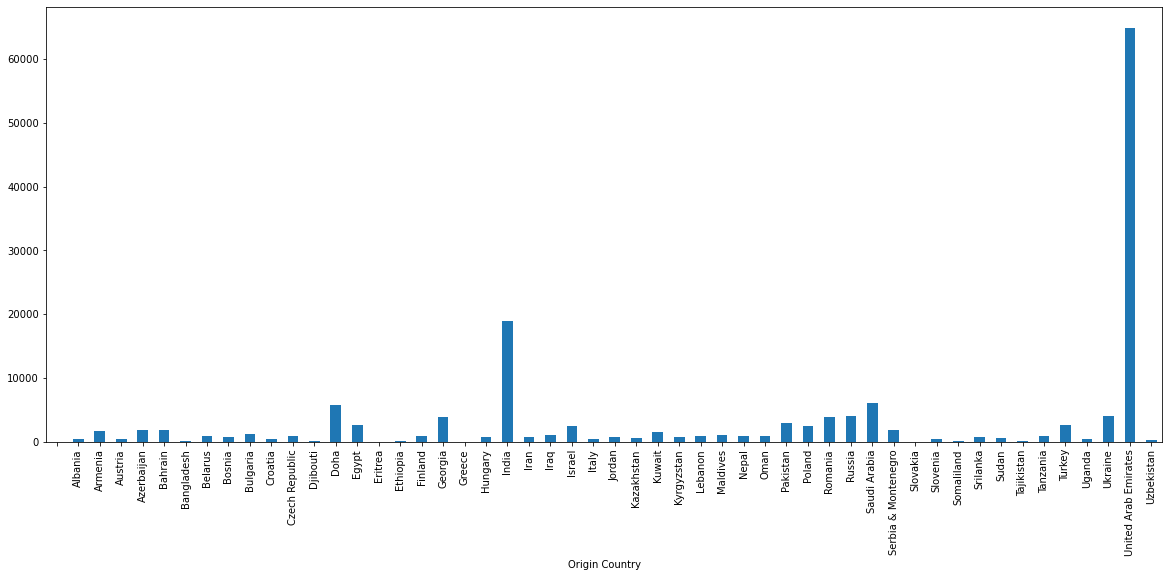

In [43]:
# Origin Country wise Anc Buying

df3 = df[df["ANC"]!= ""]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
df3.groupby("Origin Country")["ANC"].count().plot.bar()

# Destination Country

<AxesSubplot:xlabel='Destination Country'>

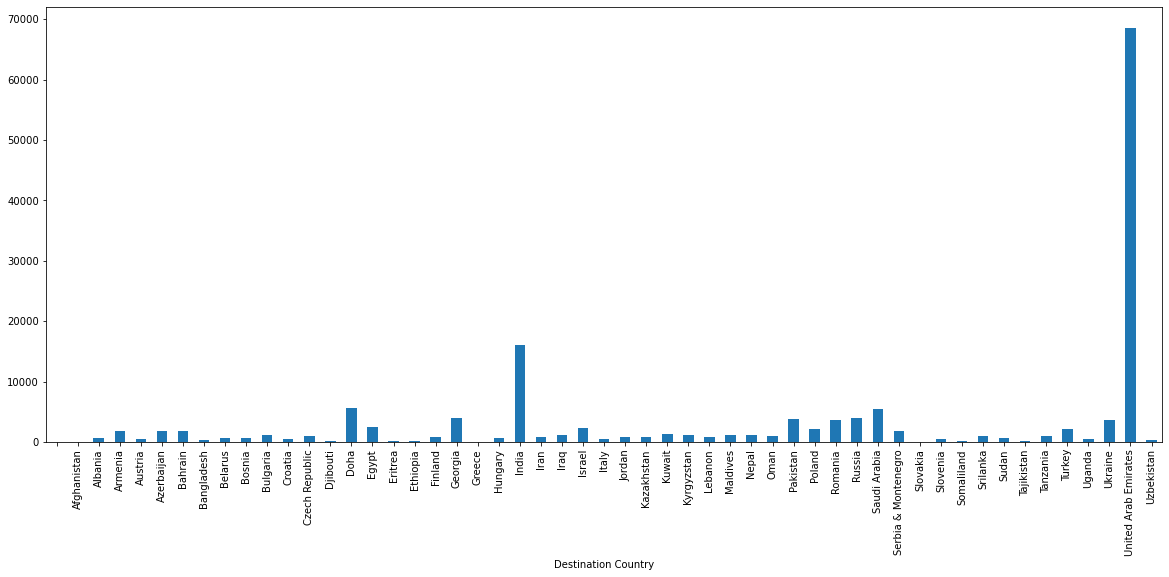

In [46]:
plt.figure(figsize=(20,8))
df3.groupby("Destination Country")["ANC"].count().plot.bar()

# Conclusion

Only Dominant Countries have higher percentage of buying Ancillary.

<AxesSubplot:xlabel='Destination Region'>

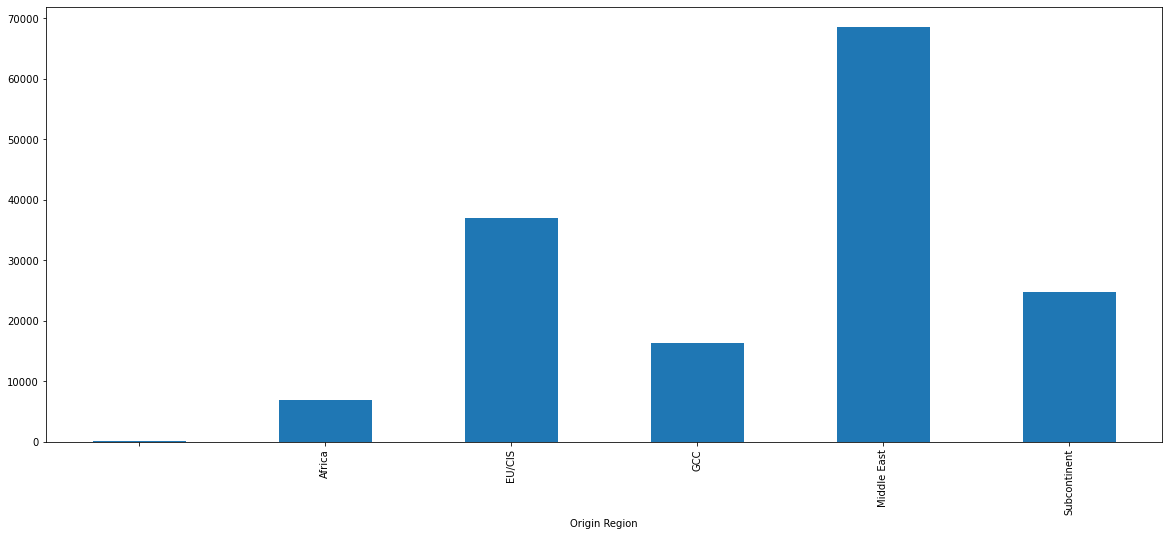

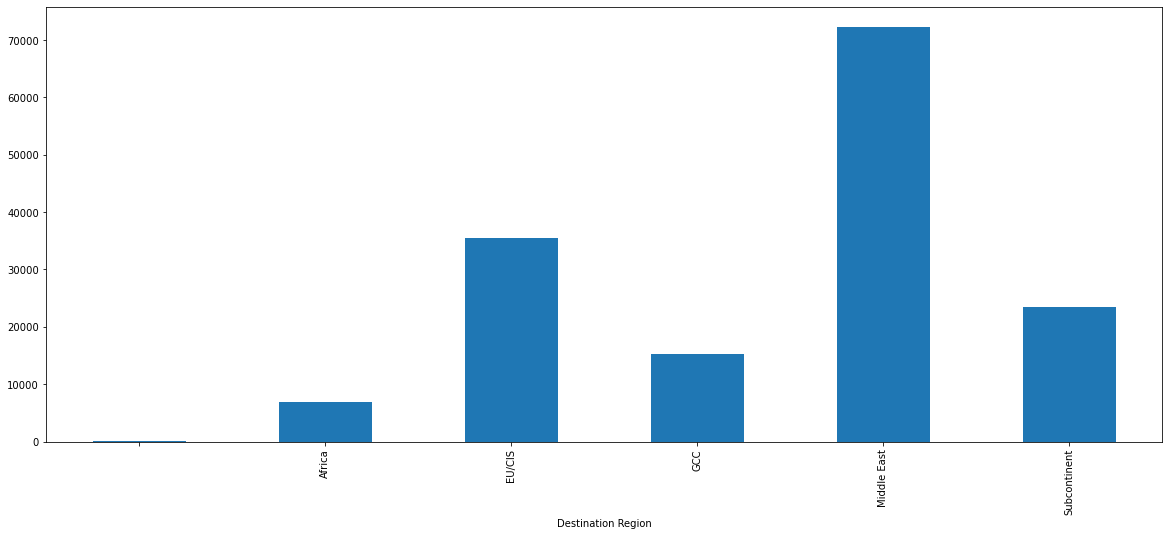

In [47]:
# Origin and Destination Region

plt.figure(figsize=(20,8))
df3.groupby("Origin Region")["ANC"].count().plot.bar()

plt.figure(figsize=(20,8))
df3.groupby("Destination Region")["ANC"].count().plot.bar()

# Conclusion

Most Of the Ancillaries are bought from Middle East

# Checking Combinations of Passengers 

<AxesSubplot:xlabel='pax'>

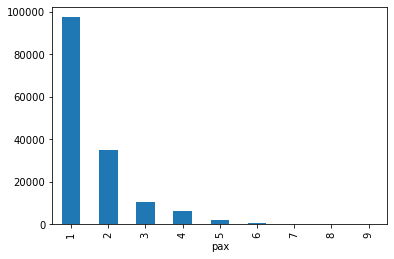

In [64]:
df3.groupby("pax")["ANC"].count().plot.bar()


# Conclusion

Most Of the Ancillaries Bought when Adult == 1

# journey_type

<AxesSubplot:xlabel='journey_type'>

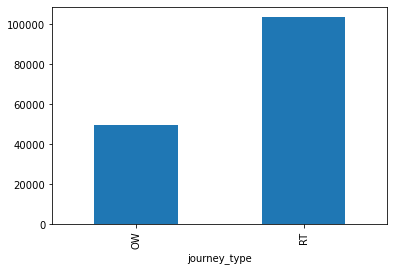

In [63]:
df3.groupby("journey_type")["ANC"].count().plot.bar()

# Days before departure

<AxesSubplot:xlabel='Days before departure'>

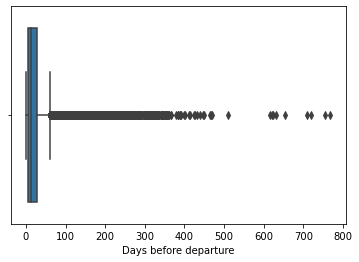

In [69]:
import seaborn as sns
sns.boxplot(data = df3 , x = "Days before departure")

In [70]:
# Removing Outliers

In [72]:
# IQR
Q1 = np.percentile(df3['Days before departure'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df3['Days before departure'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR

lower = Q1 - 1.5*IQR

print(upper)


61.5


C:\Users\sahil_pc\AppData\Local\Temp\ipykernel_15332\3243250616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Days before departure"] = np.where(df3["Days before departure"]>61.5,61.5,df3["Days before departure"])


<AxesSubplot:xlabel='Days before departure'>

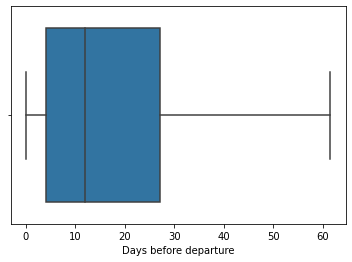

In [75]:
import numpy as np
df3["Days before departure"] = np.where(df3["Days before departure"]>61.5,61.5,df3["Days before departure"])
sns.boxplot(data = df3 , x = "Days before departure")

<AxesSubplot:xlabel='Days before departure'>

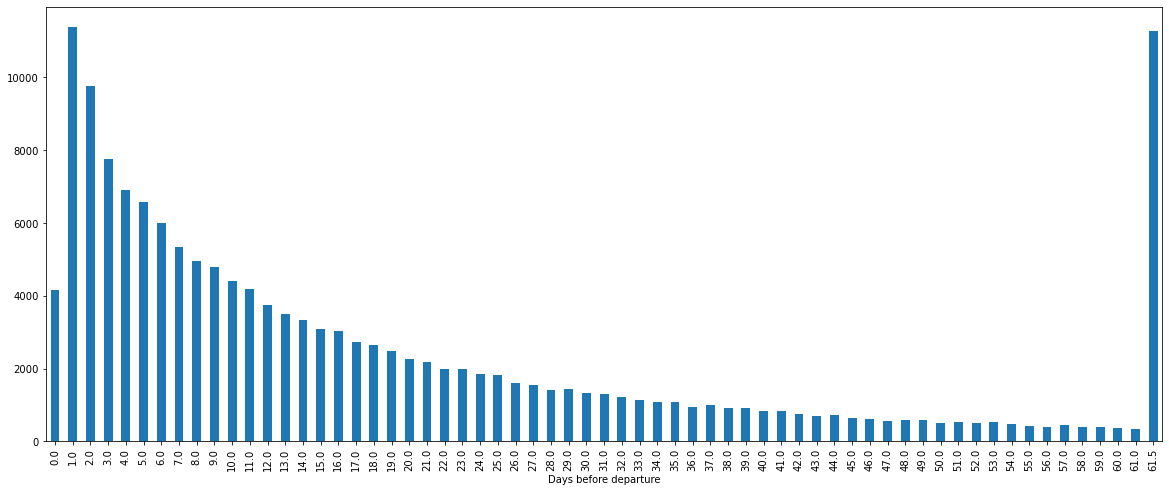

In [77]:
plt.figure(figsize=(20,8))
df3.groupby("Days before departure")["ANC"].count().plot.bar()

# Conclusion

Most of the passengers book their ticket before 1 week of their departure Date

# Revenue

<AxesSubplot:xlabel='rev'>

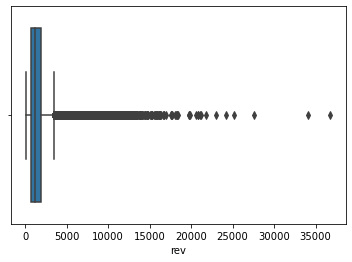

In [79]:
sns.boxplot(data = df3 , x = "rev")

In [80]:
# IQR
Q1 = np.percentile(df3['rev'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df3['rev'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR

lower = Q1 - 1.5*IQR

print(upper)

3514.0175


C:\Users\sahil_pc\AppData\Local\Temp\ipykernel_15332\425410808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rev"] = np.where(df3["rev"]>3514.0175,3514.0175,df3["rev"])


<AxesSubplot:xlabel='rev'>

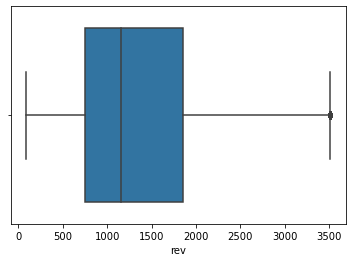

In [82]:
df3 = df[df["ANC"]!= ""]
df3["rev"] = np.where(df3["rev"]>3514.0175,3514.0175,df3["rev"])
sns.boxplot(data = df3 , x = "rev")

In [87]:
df3["rev_group"] = np.where(df3["rev"]<500,"0-500"," ")
df3["rev_group"] = np.where(df3["rev"]>500,"500-1500",df3["rev_group"])
df3["rev_group"] = np.where(df3["rev"]>1500,"1500-2500",df3["rev_group"])
df3["rev_group"] = np.where(df3["rev"]>2500,"2500-3500",df3["rev_group"])
df3["rev_group"] = np.where(df3["rev"]>3500,"3500+",df3["rev_group"])
df3.head(5)

C:\Users\sahil_pc\AppData\Local\Temp\ipykernel_15332\3942627838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rev_group"] = np.where(df3["rev"]<500,"0-500"," ")
C:\Users\sahil_pc\AppData\Local\Temp\ipykernel_15332\3942627838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rev_group"] = np.where(df3["rev"]>500,"500-1500",df3["rev_group"])
C:\Users\sahil_pc\AppData\Local\Temp\ipykernel_15332\3942627838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,UID,confirmation_num,from_airport,to_airport,year(departure_dt),month(departure_dt),res_book_dt_lcl_key,departure_dt,journey_type,pax,...,Days before departure,ANC,Origin City,Origin Country,Origin Region,Destination City,Destination Country,Destination Region,Dummy_Col,rev_group
6,DHH6AZKZNDXB,DHH6AZ,KZN,DXB,2021,11,2021-08-06 00:00:00,2021-11-06 00:00:00,RT,9,...,92,DHH6AZ,Kazan,Russia,EU/CIS,Dubai,United Arab Emirates,Middle East,1,3500+
7,DHH6AZDXBKZN,DHH6AZ,DXB,KZN,2021,11,2021-08-06 00:00:00,2021-11-17 00:00:00,RT,9,...,103,DHH6AZ,Dubai,United Arab Emirates,Middle East,Kazan,Russia,EU/CIS,1,3500+
10,U637URDMMDXB,U637UR,DMM,DXB,2021,12,2021-11-21 00:00:00,2021-12-01 00:00:00,RT,9,...,10,U637UR,Dhammam,Saudi Arabia,GCC,Dubai,United Arab Emirates,Middle East,1,1500-2500
11,9QZ93VCCUDXB,9QZ93V,CCU,DXB,2021,11,2021-10-26 00:00:00,2021-11-03 00:00:00,OW,9,...,8,9QZ93V,Kolatta,India,Subcontinent,Dubai,United Arab Emirates,Middle East,1,3500+
13,BUE0SSDXBSKT,BUE0SS,DXB,SKT,2021,9,2021-08-25 00:00:00,2021-09-25 00:00:00,OW,9,...,31,BUE0SS,Dubai,United Arab Emirates,Middle East,Sialkot,Pakistan,Subcontinent,1,3500+


<AxesSubplot:xlabel='rev_group'>

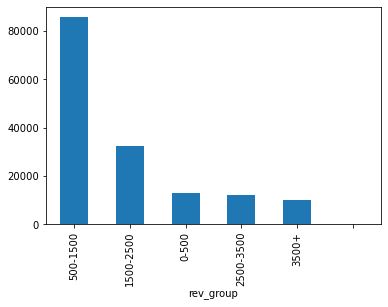

In [88]:
df3.groupby("rev_group")["ANC"].count().sort_values(ascending = False).plot.bar()

# Basic Statistics

In [ ]:
PNR Total Count

SSR YES - 103511
SSR NO - 264930


SSR BREAKUP

# Total SSR Count = 259559
# Total Meal = 11452
# Total Bags = 76980
# Total Seats = 171127

SSR BREAKUP WITH CODE TYPE

ABAG = 665      27112.26
BAGB = 23971    1669561.98
BAGL = 10988    838975.75
BAGX = 5310     568564.92
BUPL = 9159     883798.86
BUPX = 11973    2283285.21
BUPZ = 14174    2670014.78
SPEQ = 737      70111.32
JUBX = 3        600

MLIN = 11452    442771.17

FRST = 45913    2456543.98
XLGR = 56730    8345847.87
SPST = 33207    1248603.21
NSST = 35277    890644.39


# Segments

All the segments are based on the Pax group + Days before Departure + Origin + Destination

Total unique Values :
Adult = 9
Child = 8
INF = 5
Origin = Top 11  ["DXB","DOH","TBS","OTP","KBP","DEL","HBE","TLV","BOM","DMM","REST"]
Destination = Top 11  ["DXB","DOH","TBS","OTP","DMM","TLV","KBP","GYD","HBE","BOM","REST"]
days Before departure = 5

Total Segments = 9 * 7 * 4 * 11 * 11 * 5 = 217800 Segments



In [ ]:
# Total
Total PNR = 368441    
Total Journey = 521532
Total Passengers = 787970
Total Revenue = 73,14,08,135.6 + 2,23,96,435.70 = 75,38,04,570

#Only SSR
Total SSR bookings = 103511
Total SSR journeys = 153388
Total SSR counts = 259559
Total SSR revenue amount =  23,60,38,624.2 + 2,23,96,435.70= 25,84,35,059.9

#only base 
Total PNR =  264930
Total Journey = 3,68,144
Total Revenue (No ANC) = 49,53,34,047.7
Total Revenue (With ANC) = 49,53,34,047.7 + 23,60,38,624.2 = 73,14,08,135.6
  

#SSR wise break up numbers and amount

SSR   Count       Rev
ABAG =665       27112.26
BAGB =23971     1669561.98
BAGL =10988     838975.75
BAGX =5310      568564.92
BUPL =9159      883798.86
BUPX =11973     2283285.21
BUPZ =14174     2670014.78
SPEQ =737       70111.32
JUBX =3         600

MLIN =11452     442771.17

FRST =45913     2456543.98
XLGR =56730     8345847.87
SPST =33207     1248603.21
NSST =35277     890644.39

% SSR = SSR Revenue / Total base Revenue

=2,23,96,435.70 /  731408135.6 
= 3%

% SSR = SSR Revenue / (Total Base Revenue + SSR Revenue) 
= 2,23,96,435.70/ (731408135.6,2,23,96,435.70)
=2.97%


